# 演示直接控制DC nco 产生单频正弦波

## xrfdc 必须先于Overlay引入
## 如果overlay不是2020.2 开发，则需要在Overlay('dc_nco/nco.bit')时调整为Overlay('dc_nco/nco.bit'，ignore_version=True)

## 此案例使用DAC0 输出受控NCO 单频正弦波

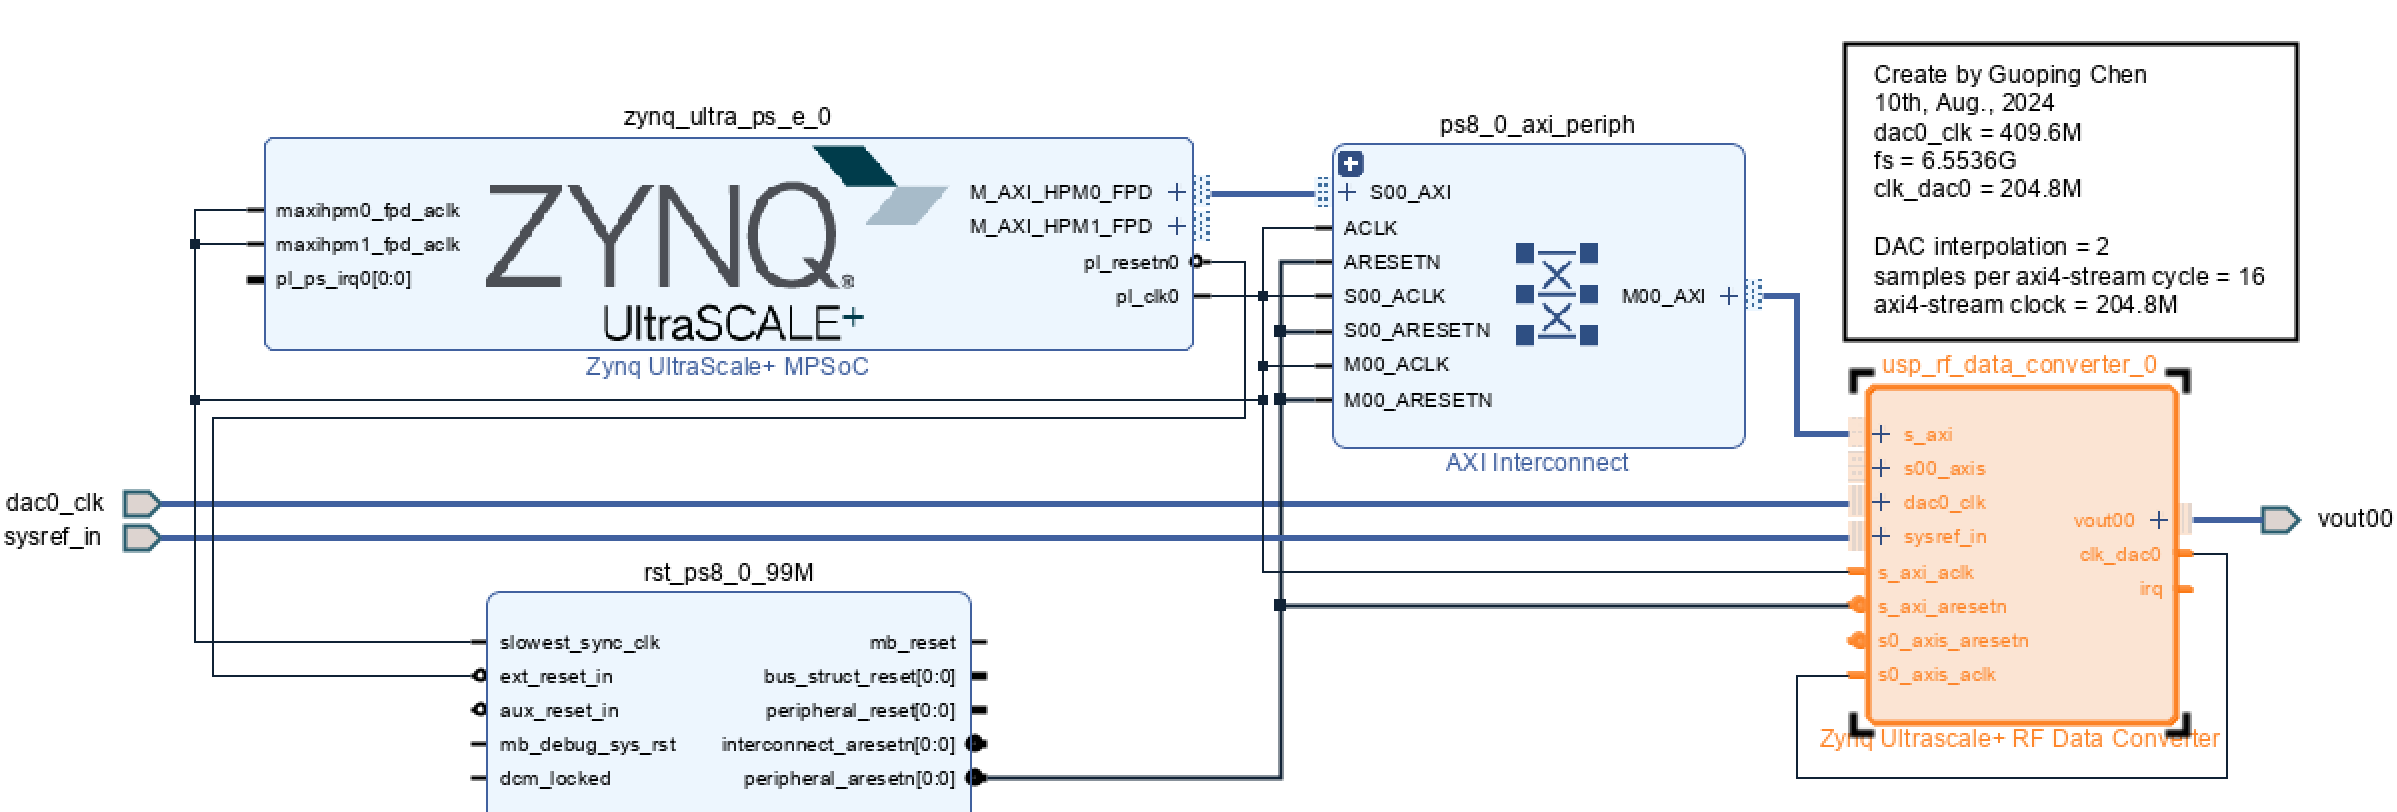

github.com/chenguoping76/rfsoc_27dr/blob/main/dc_nco/dac_nco.ipynb

In [1]:
import xrfdc

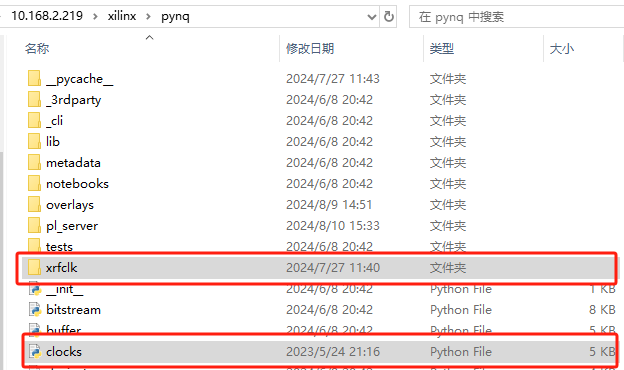

In [2]:
from pynq import Overlay, clocks

## clocks 执行搜索当前目录下的xrfclk\的时间配置txt文件
## 引入的新py文件

In [3]:
ol = Overlay('dc_nco/nco.bit')

In [4]:
import xrfclk

## 按vivado设计使用409.6MHz外部射频时钟，注意：dac0_clk如不对，后面的dac_tile.StartUp() 无法启动

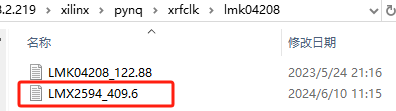

In [5]:
clocks.set_custom_lmclks()

In [6]:
rf = ol.usp_rf_data_converter_0

In [7]:
dac_tile = rf.dac_tiles[0]

In [8]:
dac_block = dac_tile.blocks[0]

## DynamicPLLConfig(1, 409.6, 6553.6) 
### 0: adc; 1: dac
### 409.6 参考输入时钟
### 6553.6 采样时钟

In [9]:
dac_tile.DynamicPLLConfig(1, 409.6, 6553.6)

In [10]:
dac_block.NyquistZone = 1

In [12]:
dac_block.MixerSettings = {
    'CoarseMixFreq':  xrfdc.COARSE_MIX_BYPASS,
    'EventSource':    xrfdc.EVNT_SRC_IMMEDIATE,
    'FineMixerScale': xrfdc.MIXER_SCALE_1P0,
    'Freq':           100,
    'MixerMode':      xrfdc.MIXER_MODE_C2R,
    'MixerType':      xrfdc.MIXER_TYPE_FINE,
    'PhaseOffset':    0.0
    }

In [13]:
dac_block.UpdateEvent(xrfdc.EVENT_MIXER)

In [14]:
dac_tile.StartUp()